# **Spotify Analysis** 
by
### ***Abhyuday mishra***

Spotify was founded in April 2006 as a Swedish audio streaming and media services provider. It is the world's largest provider of music streaming services, with over 381 million monthly active users, including 172 million paid subscribers.

We'll look at and quantify data about music to gain valuable insights.

Using Python, conduct an exploratory data analysis (EDA) and data visualisation project with Spotify data.

Spotify Data Analysis makes use of secondary Spotify data. Data will be used by students to identify patterns and relationships between various characteristics. The activity will help students improve their ability to review and interpret data. The activity begins by encouraging students to consider questions that the dataset might answer, thereby developing their "problem solving" skills. After analysing the dataset, learners will be able to reorganise and restructure the data to help them answer their questions.

Github:- https://github.com/abhyudaymishra

In [70]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
#importing and mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/Exploratory Data Analysis Projects/Spotify_final_dataset[1].csv")

In [73]:
#Finding the first five rows of the dataset
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [74]:
#Finding the number of rows and columns
print(f"This data set contains {df.shape[1]} columns and {df.shape[0]} rows")

This data set contains 9 columns and 11084 rows


In [75]:
#Finding the name of Columns
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [77]:
#Checking if there is any null values in the dataset
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Position  Artist Name  Song Name   Days  Top 10 (xTimes)  \
0         False        False      False  False            False   
1         False        False      False  False            False   
2         False        False      False  False            False   
3         False        False      False  False            False   
4         False        False      False  False            False   
...         ...          ...        ...    ...              ...   
11079     False        False      False  False            False   
11080     False        False      False  False            False   
11081     False        False      False  False            False   
11082     False        False      False  False            False   
11083     False        False      False  False            False   

       Peak Position  Peak Position (xTimes)  Peak Streams  Total Streams  
0              False                   False         Fals

In [78]:
#Finding the description of the dataset 
df.describe()

,Position,Days,Top 10 (xTimes),Peak Position,Peak Streams,Total Streams
count,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04,1.108400e+04
mean,5542.500000,53.366925,2.713641,83.070101,5.529469e+05,1.830891e+07
std,3199.819526,129.750902,15.604130,58.932049,6.282936e+05,5.219383e+07
min,1.000000,1.000000,0.000000,1.000000,4.432300e+04,4.432300e+04
25%,2771.750000,2.000000,0.000000,29.000000,2.431595e+05,3.824272e+05
50%,5542.500000,7.000000,0.000000,75.000000,3.505885e+05,1.704876e+06
75%,8313.250000,39.000000,0.000000,132.000000,5.963382e+05,1.078333e+07
max,11084.000000,2547.000000,302.000000,200.000000,7.786096e+06,8.833697e+08


In [79]:
df['Position'].value_counts()

1        1
7394     1
7386     1
7387     1
7388     1
        ..
3696     1
3697     1
3698     1
3699     1
11084    1
Name: Position, Length: 11084, dtype: int64

In [80]:
mean_value=df.mean()

<ipython-input-80-409f7f1ae28c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_value=df.mean()


In [81]:
df.fillna(value=mean_value,inplace=True)


## 1. Which artist has the most songs?
to get the Artist with most songs we will use groupby function

In [82]:
# Group the data by the "Artist Name" column
grouped = df.groupby("Artist Name")

# Count the number of songs for each artist
artist_counts = grouped["Song Name"].count().reset_index(name="Songs")

# Sort the data in descending order by the number of songs
artist_counts = artist_counts.sort_values("Songs", ascending=False)

# Display the result
print("The artist with the most songs in the Spotify dataset is:")
print(artist_counts.iloc[0, 0], "with", artist_counts.iloc[0, 1], "songs.")


The artist with the most songs in the Spotify dataset is:
Drake  with 208 songs.


## 2.Who are the Top 10 Artists?

In [83]:
# Group the data by 'Artist Name' and sum the values
grouped = df.groupby('Artist Name').sum()

# Sort the values in descending order
grouped = grouped.sort_values(by='Position', ascending=False)

# Take the top 10 artists
top_10_artists = grouped.head(10)

# Print the result
print("Top 10 Artists:")
print(top_10_artists)


Top 10 Artists:
                             Position   Days  Top 10 (xTimes)  Peak Position  \
Artist Name                                                                    
Future                        1020360   6126            232.0          12041   
Logic                          691713   2356            145.0           8471   
YoungBoy Never Broke Again     652820   1134              0.0           9997   
Trippie Redd                   646032   2569             16.0           6798   
Taylor Swift                   602797   5868            615.0           5730   
Drake                          564729  22014           2364.0           5078   
Lil Baby                       542180   5792            208.0           5809   
Young Thug                     539194   2924             78.0           7881   
NAV                            475160   1545              9.0           6775   
Mac Miller                     441280   1438             29.0           5980   

                       

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

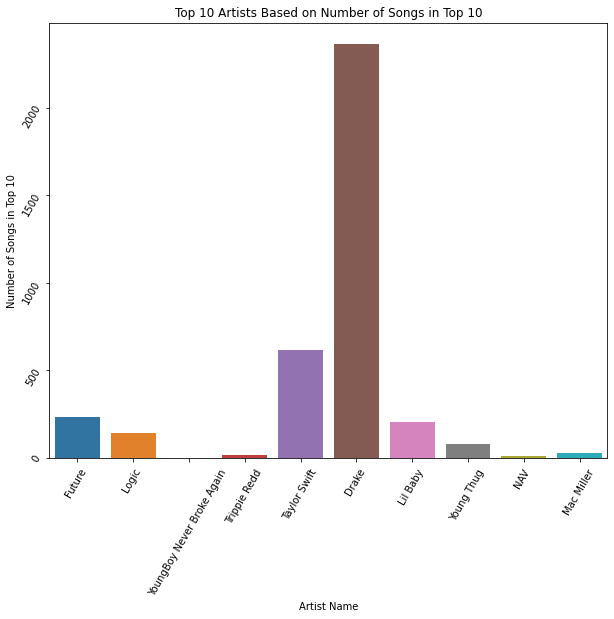

In [84]:
# Plot the bar plot of the top 10 artists
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_artists.index, y=top_10_artists['Top 10 (xTimes)'])
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs in Top 10')
plt.title('Top 10 Artists Based on Number of Songs in Top 10')
plt.xticks(rotation=60)
plt.yticks(rotation=60)


## 3.What is the median number of streams among the songs in the dataset?

In [85]:
median_streams = df['Peak Streams'].median()
print(median_streams)

350588.5


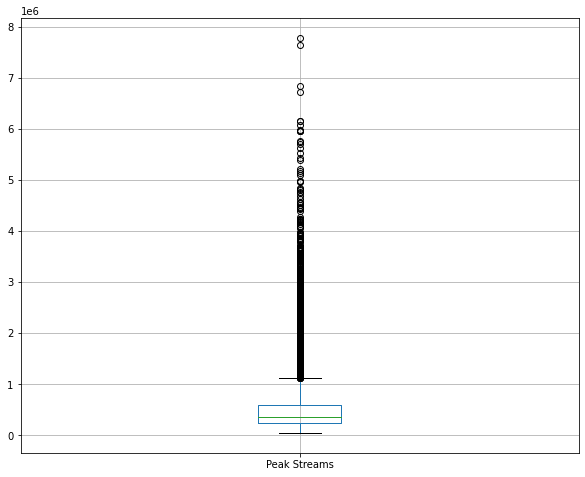

In [86]:
# Create a box plot of the 'Streams' column
df.boxplot(column='Peak Streams', vert=True,figsize=(10,8))
plt.show()


## 4. What is the maximum and minimum duration of songs in the dataset?

In [87]:
print(df['Peak Streams'].max())
print(df['Peak Streams'].min())

7786096
44323


## 5. What was the most popular song on Spotify based on its peak position?

In [88]:
most_popular_song = df.loc[df['Peak Position'].idxmin(), 'Song Name']
print("The most popular song on Spotify based on its peak position was:", most_popular_song)


The most popular song on Spotify based on its peak position was: Sunflower  SpiderMan: Into the SpiderVerse


## 6. How many songs were in the top 10 of Spotify's charts?

In [89]:
num_songs_in_top_10 = len(df[df['Top 10 (xTimes)'] > 0])
print("The number of songs in the top 10 of Spotify's charts was:", num_songs_in_top_10)


The number of songs in the top 10 of Spotify's charts was: 1230


## 7. What was the average number of days a song spent in the top 10?

In [90]:
average_days_in_top_10 = df[df['Top 10 (xTimes)'] > 0]['Days'].mean()
print("The average number of days a song spent in the top 10 was:", average_days_in_top_10)


The average number of days a song spent in the top 10 was: 209.35691056910568


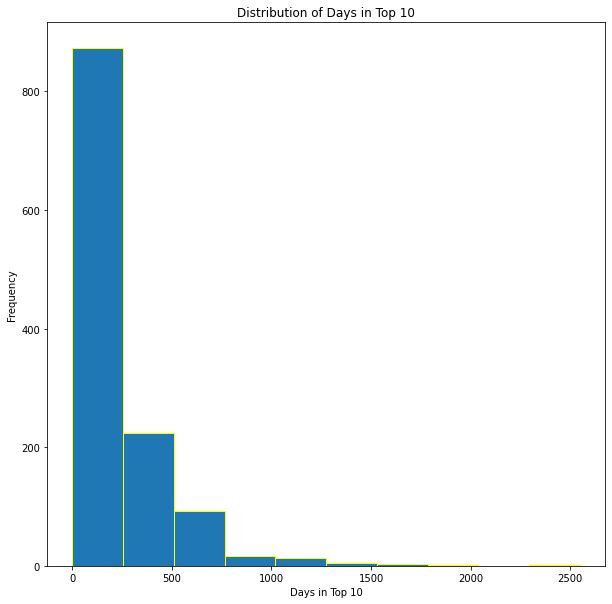

In [91]:
# Let"s plot a Histogram for the above data 

days_in_top_10 = df[df['Top 10 (xTimes)'] > 0]['Days']
plt.figure(figsize=(10,10))
plt.hist(days_in_top_10, bins=10, edgecolor='yellow')
plt.xlabel('Days in Top 10')
plt.ylabel('Frequency')
plt.title('Distribution of Days in Top 10')
plt.show()


## 8. Was there a correlation between the number of days a song was in the top 10 and its peak position?

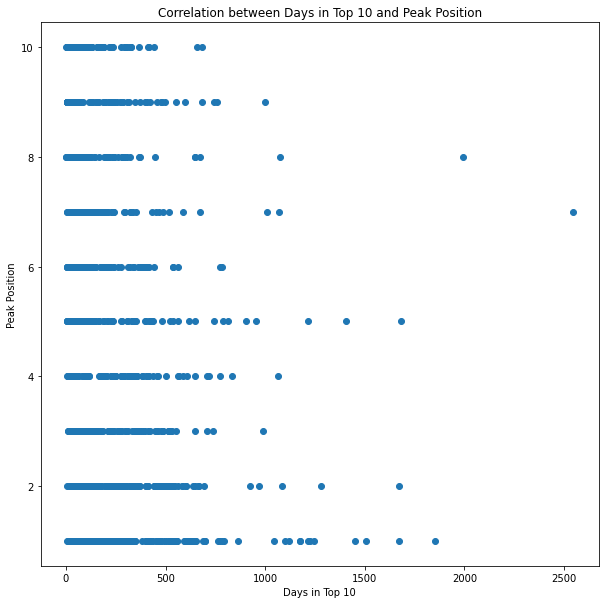

In [92]:

df_top_10 = df[df['Top 10 (xTimes)'] > 0]
plt.figure(figsize=(10,10))
plt.scatter(df_top_10['Days'], df_top_10['Peak Position'],cmap='Red')
plt.xlabel('Days in Top 10')
plt.ylabel('Peak Position')
plt.title('Correlation between Days in Top 10 and Peak Position')
plt.show()


## 9. Who was the most successful artist on Spotify based on the number of streams in the top 10?

In [93]:
grouped = df.groupby('Artist Name').sum()
grouped = grouped.sort_values(by='Total Streams', ascending=False)
top_10_artists = grouped.head(10)
print("The top 10 most successful artists on Spotify based on the number of Streams in the top 10 were:")
print(top_10_artists.index.tolist())



The top 10 most successful artists on Spotify based on the number of Streams in the top 10 were:
['Drake ', 'Post Malone ', 'Juice WRLD ', 'The Weeknd ', 'XXXTENTACION ', 'Taylor Swift ', 'Ariana Grande ', 'Billie Eilish ', 'Lil Uzi Vert ', 'Bad Bunny ']


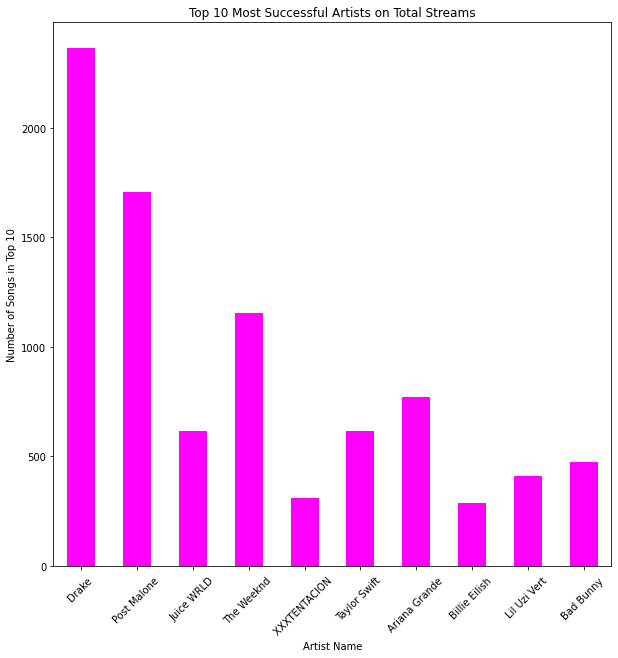

In [94]:
# Plotting the bar graph
top_10_artists['Top 10 (xTimes)'].plot(kind='bar',figsize=(10,10),cmap="spring")

plt.xlabel('Artist Name')
plt.ylabel('Number of Songs in Top 10')
plt.title('Top 10 Most Successful Artists on Total Streams')
plt.xticks(rotation=45)
plt.show()


## 10. How many songs did each artist have in the top 10 of Spotify's charts?

In [95]:
grouped = df.groupby('Artist Name').sum()
grouped = grouped.sort_values(by='Top 10 (xTimes)', ascending=False)
songs_in_top_10 = grouped['Top 10 (xTimes)']
print("The number of songs each artist had in the top 10 of Spotify's charts:")
print(songs_in_top_10)


The number of songs each artist had in the top 10 of Spotify's charts:
Artist Name
Drake             2364.0
Post Malone       1706.0
The Weeknd        1157.0
Ariana Grande      769.0
Justin Bieber      675.0
                   ...  
Hudson Thames        0.0
Huddy                0.0
House Of Pain        0.0
Hotel Ugly           0.0
Ñengo Flow           0.0
Name: Top 10 (xTimes), Length: 1612, dtype: float64


## 12. Did the number of streams for a song in the top 10 increase over time?

In [96]:
top_10_songs = df[df['Top 10 (xTimes)'] > 0]

# Grouping the data by the number of days a song spent in the top 10
grouped = top_10_songs.groupby('Days')

# Calculating the average number of streams for each group
average_streams = grouped['Total Streams'].mean()


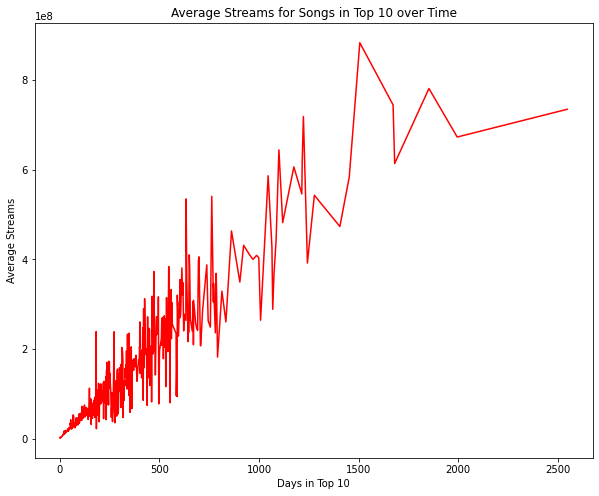

In [97]:
# Plotting the average number of streams over time
average_streams.plot(figsize=(10,8),color="red")
plt.xlabel('Days in Top 10')
plt.ylabel('Average Streams')
plt.title('Average Streams for Songs in Top 10 over Time')
plt.show()


## 13. How did the number of streams for songs in the top 10 compare to the number of streams for songs that were not in the top 10?

In [98]:
# Filtering the songs to only include songs that were in the top 10
top_10_songs = df[df['Top 10 (xTimes)'] > 0]
# Filtering the songs to only include songs that were not in the top 10
not_top_10_songs = df[df['Top 10 (xTimes)'] == 0]

# Calculating the total number of streams for each set of songs
top_10_streams = top_10_songs['Total Streams'].sum()
not_top_10_streams = not_top_10_songs['Total Streams'].sum()

print(top_10_streams)
not_top_10_streams

114646494204


88289471876

<ipython-input-99-ddd900f97468>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  pie_chart.pie(sizes,labels=['Top 10 Songs', 'Not Top 10 Songs'], colors=['salmon','royalblue'], autopct='%1.1f%%', startangle=90)


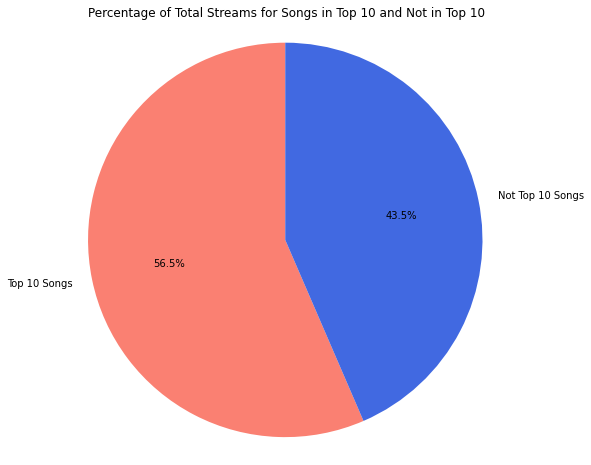

In [99]:
# Plotting the Comparison by Pie cahrt for better understanding 
dig,pie_chart= plt.subplots(figsize=(10,8))
sizes = [top_10_streams, not_top_10_streams], 
pie_chart.pie(sizes,labels=['Top 10 Songs', 'Not Top 10 Songs'], colors=['salmon','royalblue'], autopct='%1.1f%%', startangle=90)
pie_chart.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Total Streams for Songs in Top 10 and Not in Top 10')
plt.show()


## 14.Did the songs that had the most success on the charts also have the most streams?

In [100]:
# Grouping the data by Song Name and find the sum of each song's streams
grouped = df.groupby('Song Name').sum()

# Sorting the data by Peak Position in ascending order (1 is the highest position)
grouped = grouped.sort_values(by='Peak Position')

# Finding the songs with the highest peak position and the highest total streams
most_successful_songs = grouped.sort_values(by='Peak Position', ascending=False).head(10)
most_streamed_songs = grouped.sort_values(by='Total Streams', ascending=False).head(10)

# Comparing the most successful songs to the most streamed songs
print("Songs with the most success on the charts:")
print(most_successful_songs[['Peak Position', 'Total Streams']])
print("\nSongs with the most streams:")
print(most_streamed_songs[['Peak Position', 'Total Streams']])


Songs with the most success on the charts:
              Peak Position  Total Streams
Song Name                                 
Intro                   923       26931267
Higher                  766        7647473
Forever                 729       52278462
Nobody                  664        1692903
Silent Night            622        9900366
Alone                   616       10470171
Silver Bells            594       36732615
Dreams                  573        2950976
Up                      572      177775030
Sorry                   564      232982056

Songs with the most streams:
                                            Peak Position  Total Streams
Song Name                                                               
Sunflower  SpiderMan: Into the SpiderVerse              1      883369738
Lucid Dreams                                          188      865035293
XO TOUR Llif3                                           1      781153024
Stay                                          

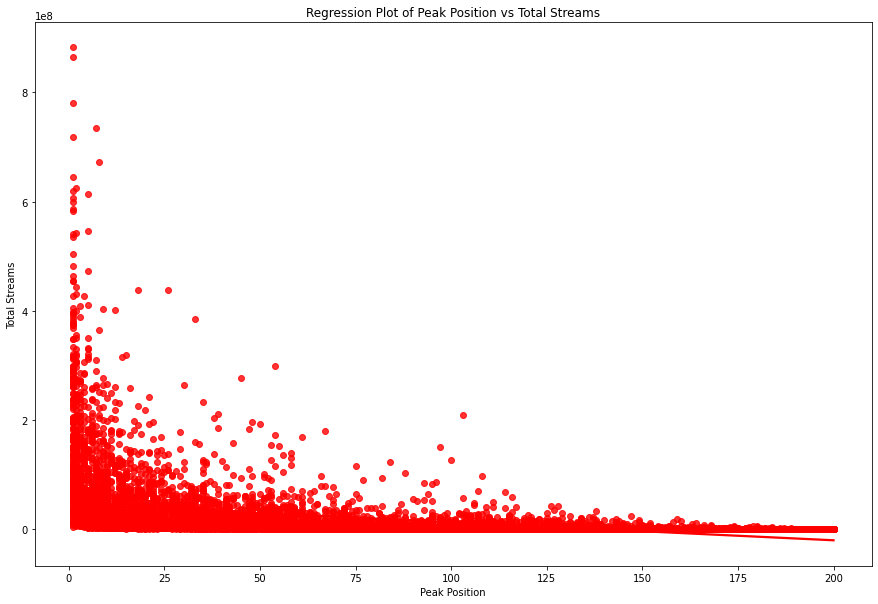

In [101]:
# Plot a regression plot of the relationship between Peak Position and Total Streams

plt.figure(figsize=(15,10))
sns.regplot(x='Peak Position', y='Total Streams', data=df,color="red")
plt.xlabel('Peak Position')
plt.ylabel('Total Streams')
plt.title('Regression Plot of Peak Position vs Total Streams')
plt.show()


## 15. Is there a correlation between the artist's popularity (based on the number of songs they have in the top 10) and the average total streams of their songs also show correlation between total streams.

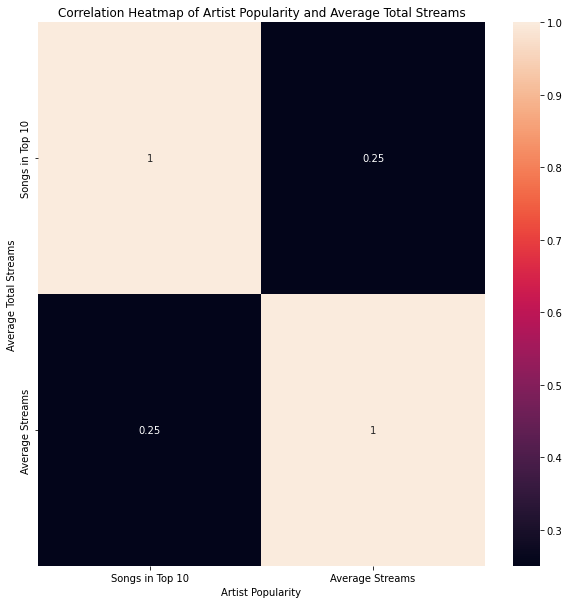

In [102]:
# calculating the average total streams of songs for each artist
grouped = df.groupby('Artist Name').mean()
grouped = grouped.sort_values(by='Top 10 (xTimes)', ascending=False)
average_streams = grouped['Total Streams']

# creating a dataframe with the number of songs each artist had in the top 10 and the average total streams of their songs
artist_popularity = pd.DataFrame({'Songs in Top 10': songs_in_top_10, 'Average Streams': average_streams})

# with the help of  heatmap we will visualize the correlation between the artist's popularity and the average total streams of their songs
plt.figure(figsize=(10,10))
sns.heatmap(artist_popularity.corr(), annot=True)
plt.xlabel('Artist Popularity')
plt.ylabel('Average Total Streams')
plt.title('Correlation Heatmap of Artist Popularity and Average Total Streams')
plt.show()


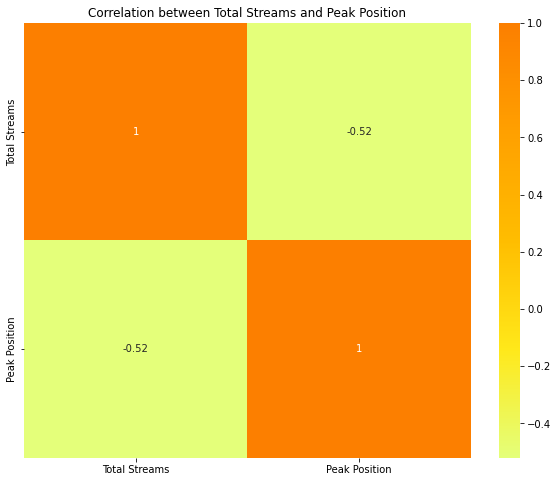

In [103]:
# To show the correlation between Total sreams and peak position we will start by Grouping the data by artist and calculate the mean of Total Streams and Peak Position for each artist
grouped = df.groupby('Artist Name').mean()
grouped = grouped[['Total Streams', 'Peak Position']]

# Now trying to Compute the correlation matrix
corr = grouped.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Wistia')
plt.title('Correlation between Total Streams and Peak Position')
plt.show()


## Overall Correlation of the dataset

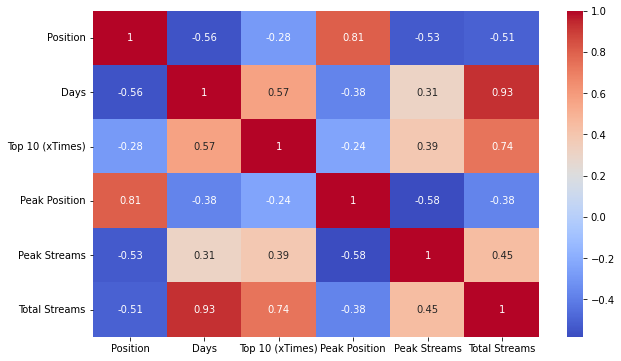

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')